In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries for data manipulation, visualization, and modeling

In [30]:
# Load the dataset from the specified CSV file into a pandas DataFrame
df = pd.read_csv('/content/Insurance  (1).csv')

In [31]:
# Display the first 10 rows of the DataFrame to get a glimpse of the data
display(df.head(10))

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [32]:
# Get information about the DataFrame, including data types and non-null counts
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

In [33]:
# Generate descriptive statistics for the numerical columns in the DataFrame
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##QUESTION:
##Explain data types and categorical variables.
##ANSWER:
##Data types refer to the kind of data a variable holds, such as numbers (integers, floats) or text (strings). Categorical variables are a specific type of variable that can take on a limited number of distinct values or categories. In your dataset, age, bmi, children, and charges are numerical, while sex, smoker, and region are categorical.

## QUESTION:
##Handle any missing data (if any).

##ANSWER:
##No missing values

In [34]:
# Check for missing values in each column of the DataFrame
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## Checking for Duplicate
##1 Duplicate found

In [35]:
# Check for duplicate rows in the DataFrame
dup = df.duplicated().sum()

In [36]:
# Print the number of duplicate rows found
print(dup)

1


In [37]:
# Drop duplicate rows from the DataFrame in place
df.drop_duplicates(inplace=True)

In [38]:
# Print the DataFrame after removing duplicates
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


##QUESTION:
##Encode categorical features (e.g., sex, smoker, region) using label encoding or
##one-hot encoding.

In [39]:
# Encode categorical features using one-hot encoding
# 'sex', 'smoker', and 'region' columns are encoded, and the first category is dropped to avoid multicollinearity
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
# Display the first few rows of the encoded DataFrame
display(df_encoded.head())

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


##QUESTION:
##Normalize or scale numerical features if required (e.g., age, bmi).

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,16884.92400,False,True,False,False,True
1,-1.511647,0.509422,-0.079442,1725.55230,True,False,False,True,False
2,-0.799350,0.383155,1.580143,4449.46200,True,False,False,True,False
3,-0.443201,-1.305052,-0.909234,21984.47061,True,False,True,False,False
4,-0.514431,-0.292456,-0.909234,3866.85520,True,False,True,False,False


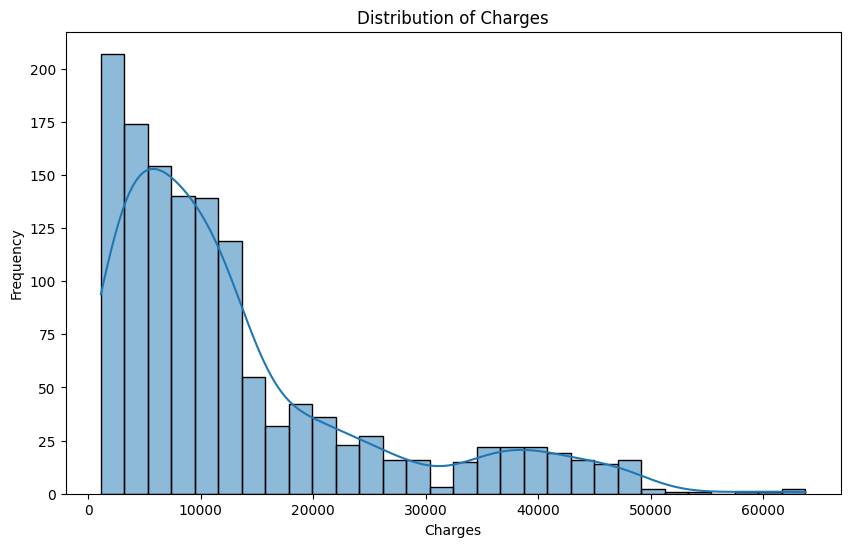

In [40]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding the encoded columns and the target variable 'charges')
numerical_cols = ['age', 'bmi', 'children']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the first few rows of the scaled DataFrame
display(df_encoded.head())

# Visualize the distribution of the target variable 'charges'
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

##QUESTOIN:
##Create Boxplot of charges by smoke/non-smoker:

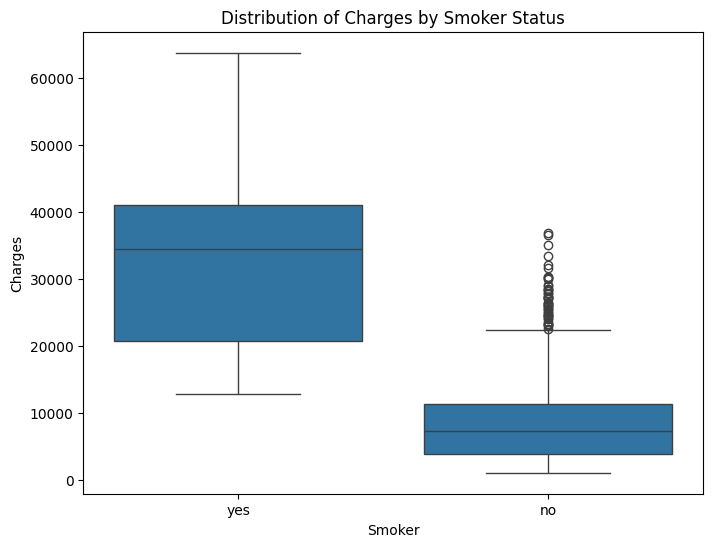

In [41]:
# Create a boxplot to visualize the distribution of charges by smoker status
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Distribution of Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

##QUESTION:
##Check correlations using a heatmap.

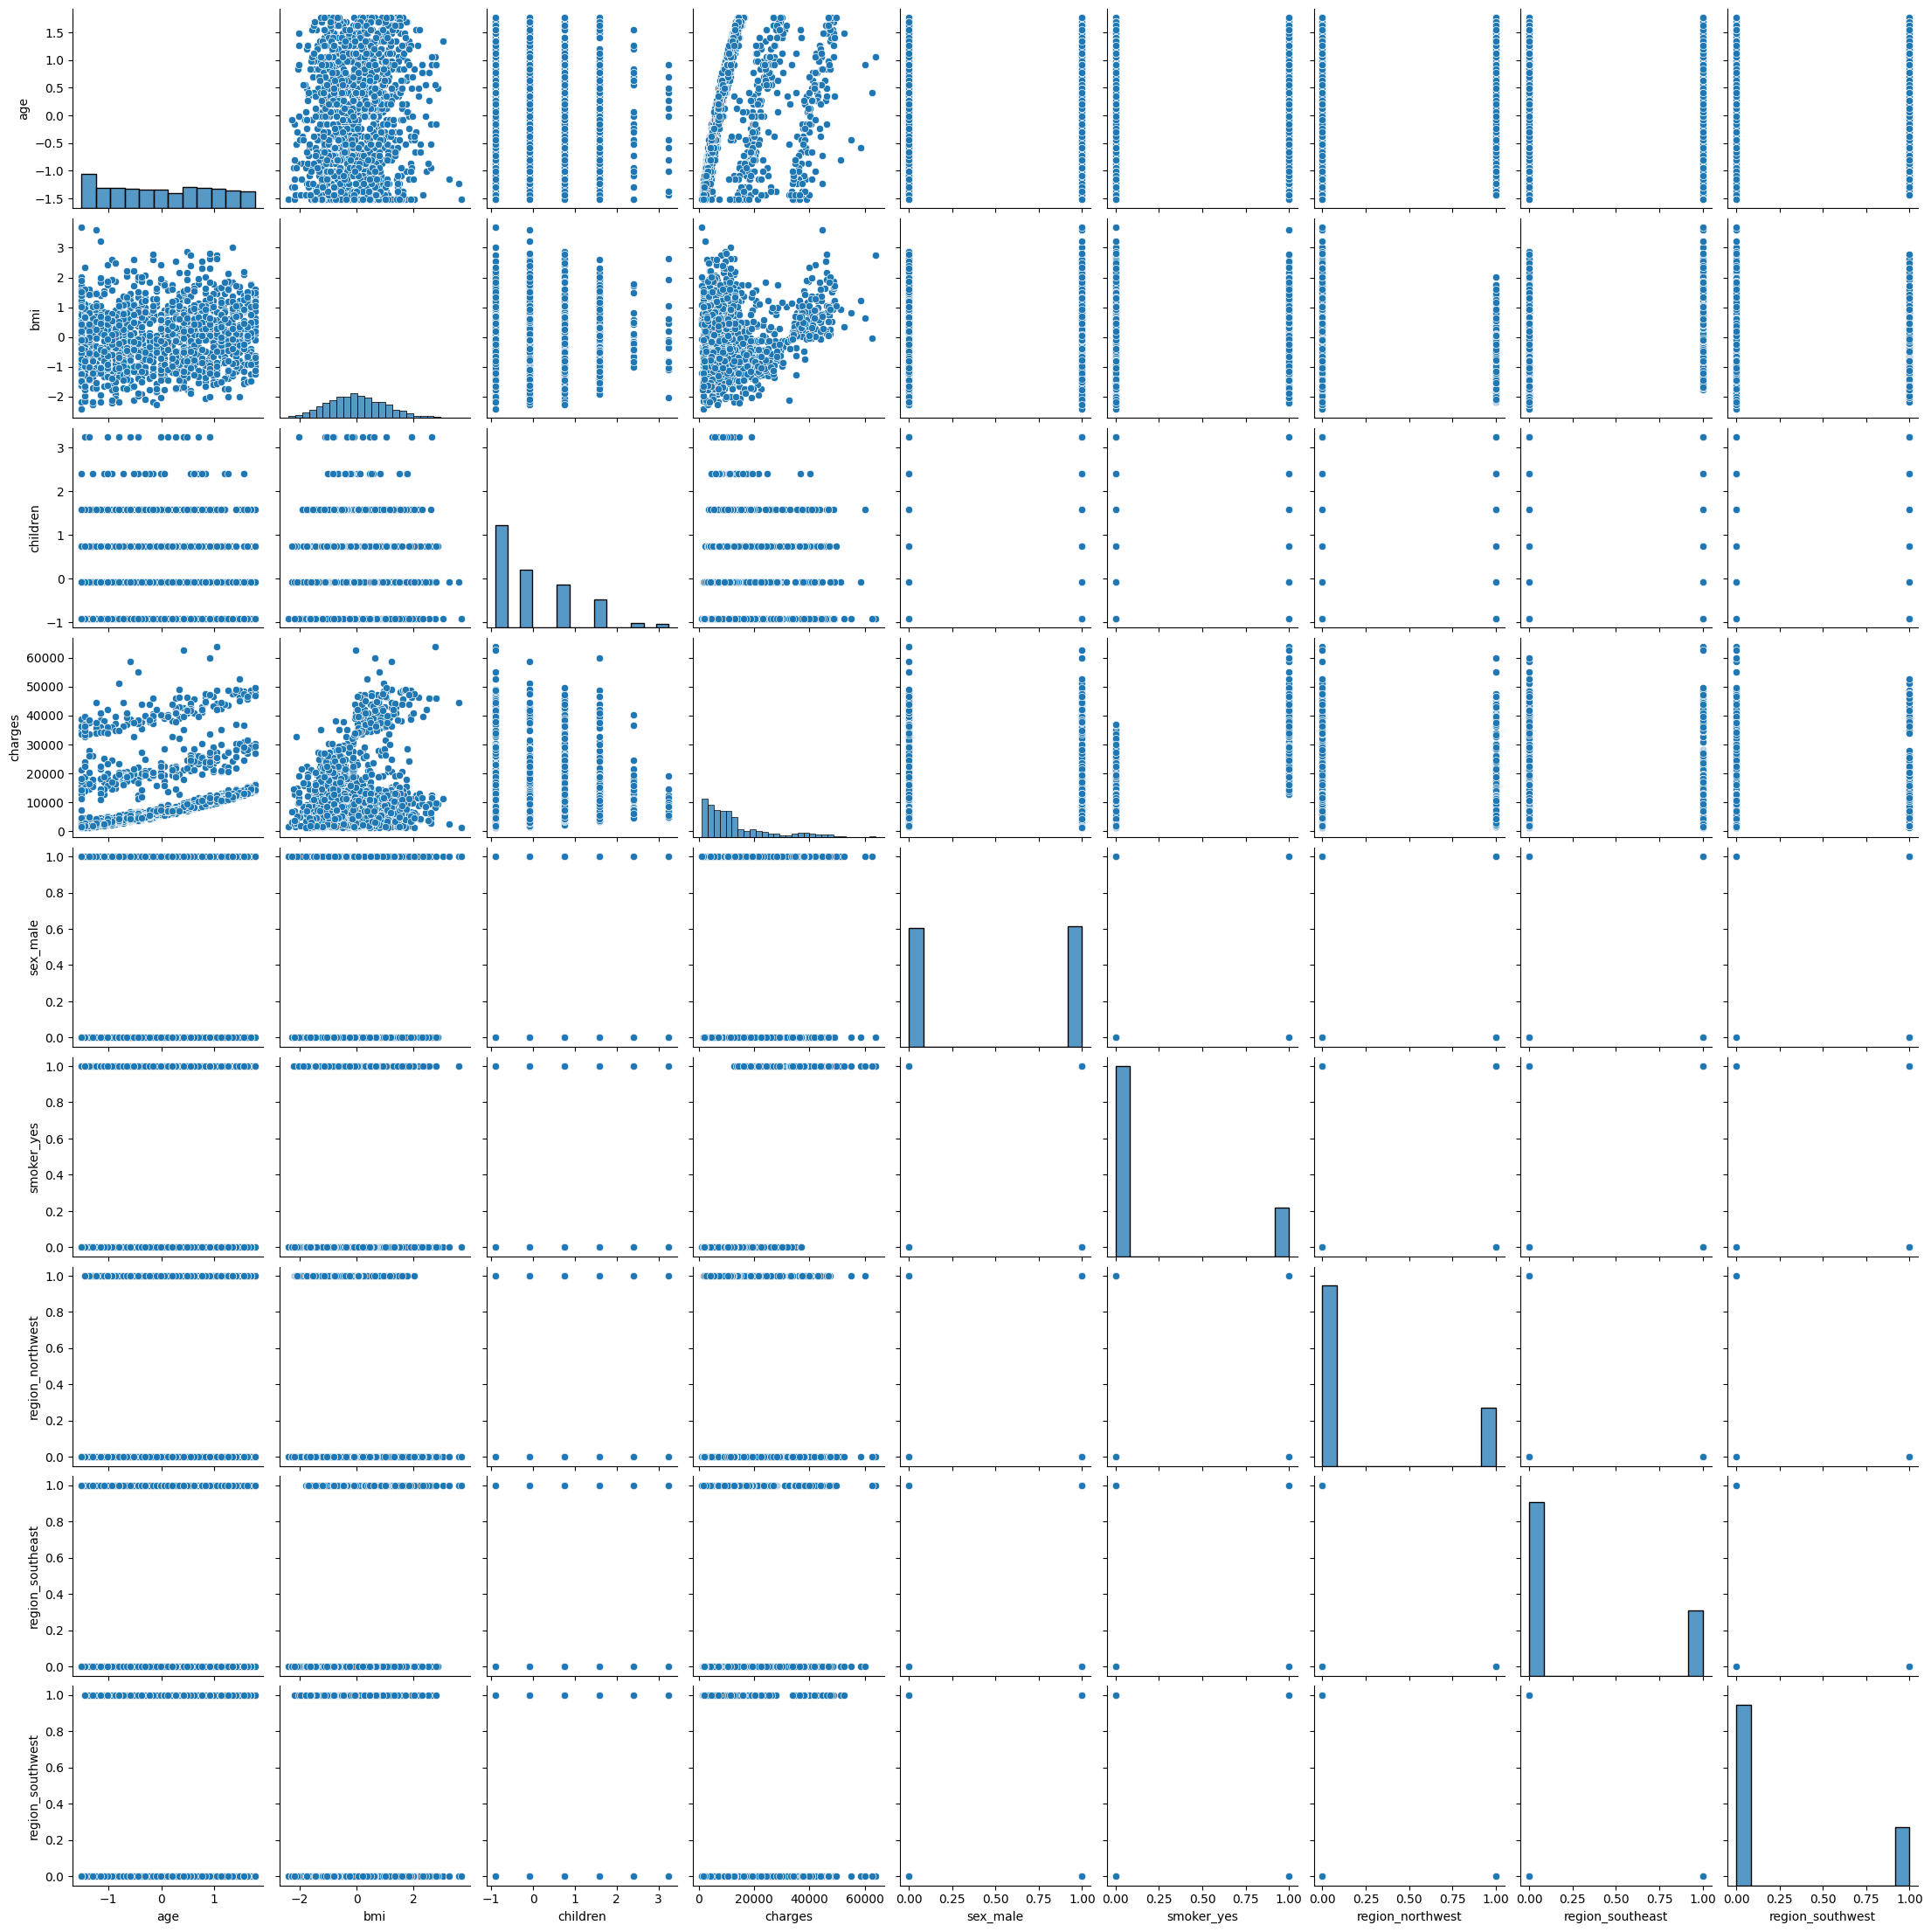

In [42]:
# Create a pair plot to observe relationships between variables
sns.pairplot(df_encoded)
plt.show()

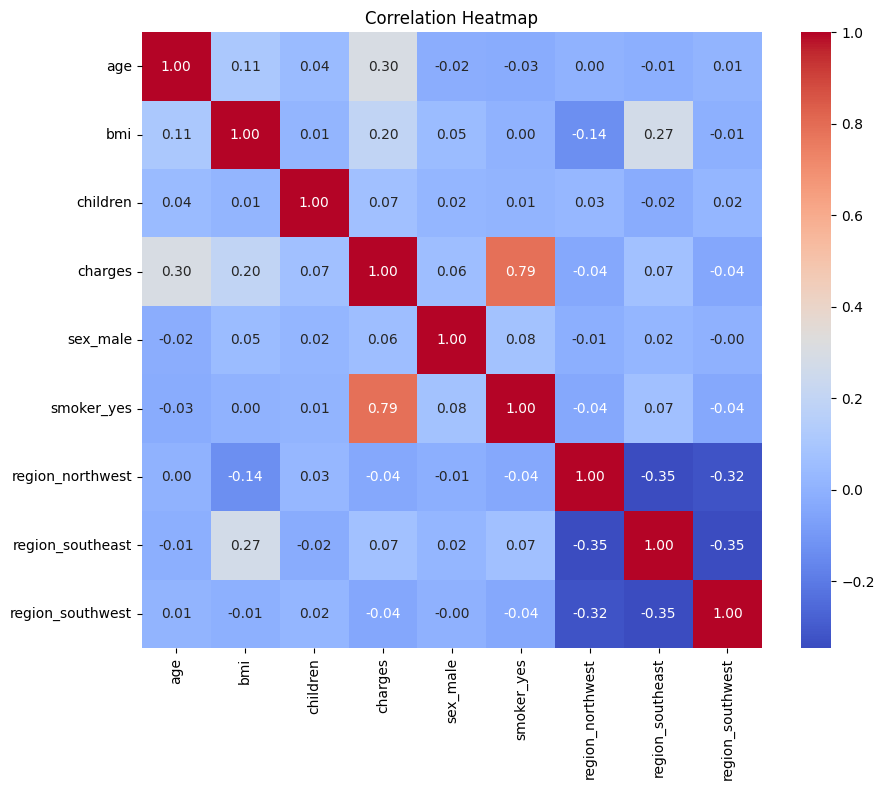

In [43]:
# Check correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##QUESTION:
##Cleaned dataset ready for modeling.

In [44]:
# Display the first few rows of the original DataFrame (before encoding and scaling)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## TRAINING AND TESTING FOR OUR MODEL

In [45]:
from sklearn.model_selection import train_test_split

# Define features (X) by dropping the target variable 'charges'
X = df_encoded.drop('charges', axis=1)
# Define the target variable (y)
y = df_encoded['charges']

# Split the data into training and testing sets with a test size of 20% and a fixed random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1069, 8)
Shape of X_test: (268, 8)
Shape of y_train: (1069,)
Shape of y_test: (268,)


##QUESTION:
##EDA visualizations (matplotlib, seaborn).

##Here is few more plots to explore the relationships between the features and charges.

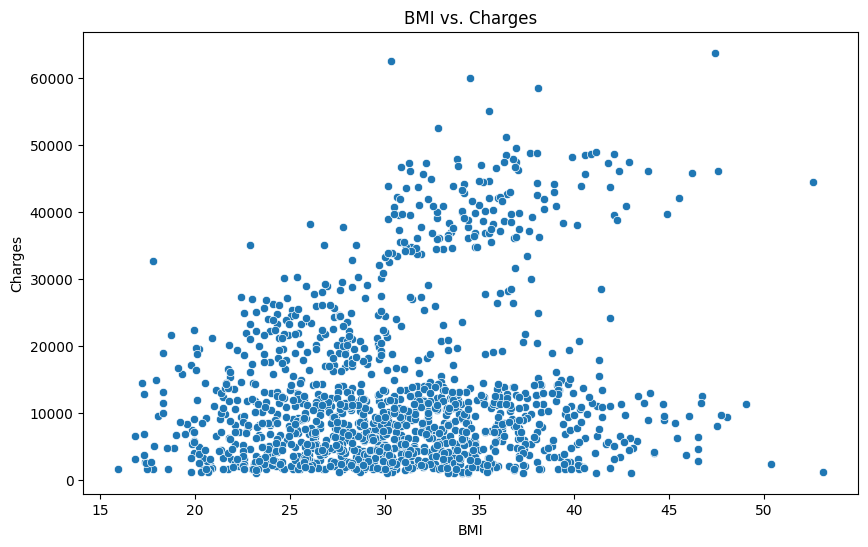

In [46]:
# Scatter plot of BMI vs. Charges to visualize their relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

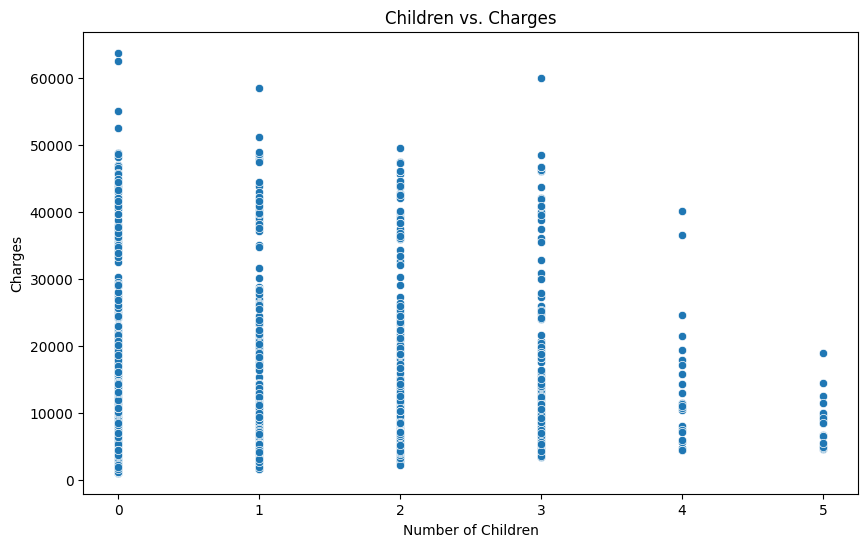

In [47]:
# Scatter plot of Children vs. Charges to visualize their relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='children', y='charges', data=df)
plt.title('Children vs. Charges')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

##QUESTION:
##Brief report describing findings from data exploration.


##ANSWER:
##Based on the data exploration we've done so far, here's a brief report of the findings:

Data Overview: The dataset contains information about insurance charges with features like age, sex, BMI, number of children, smoker status, and region. There are 1338 entries and 7 columns.
Missing Values and Duplicates: The dataset does not have any missing values. One duplicate entry was found and removed, resulting in 1337 unique entries.
Data Types: The dataset contains both numerical (age, bmi, children, charges) and categorical (sex, smoker, region) variables.
Descriptive Statistics: The describe() output shows the distribution of numerical features, including the mean, standard deviation, minimum, maximum, and quartiles. For example, the average age is around 39, and the average charge is approximately 13270.
Distribution of Charges: The histogram shows that the distribution of charges is skewed to the right, indicating that most people have lower insurance charges, while a smaller number of people have significantly higher charges.
Charges by Smoker Status: The boxplot clearly shows that smokers have significantly higher insurance charges compared to non-smokers.

In [48]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [49]:
# Output the regression coefficients learned by the model
print("Regression Coefficients:")
for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef}")

# Output the intercept of the linear model
print("\nIntercept:", model.intercept_)

Regression Coefficients:
age: 3484.6500514680847
bmi: 1943.500850582619
children: 642.3412614650827
sex_male: -101.54205399029837
smoker_yes: 23077.764592868087
region_northwest: -391.7614547836048
region_southeast: -838.9196157269685
region_southwest: -659.13975155297

Intercept: 8999.227981875709


In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 4177.05
Mean Squared Error (MSE): 35478020.68
Root Mean Squared Error (RMSE): 5956.34
R-squared (R2) Score: 0.81


## VISUALIZE:
##Actual vs. predicted charges scatter plot.
##Residuals plot.

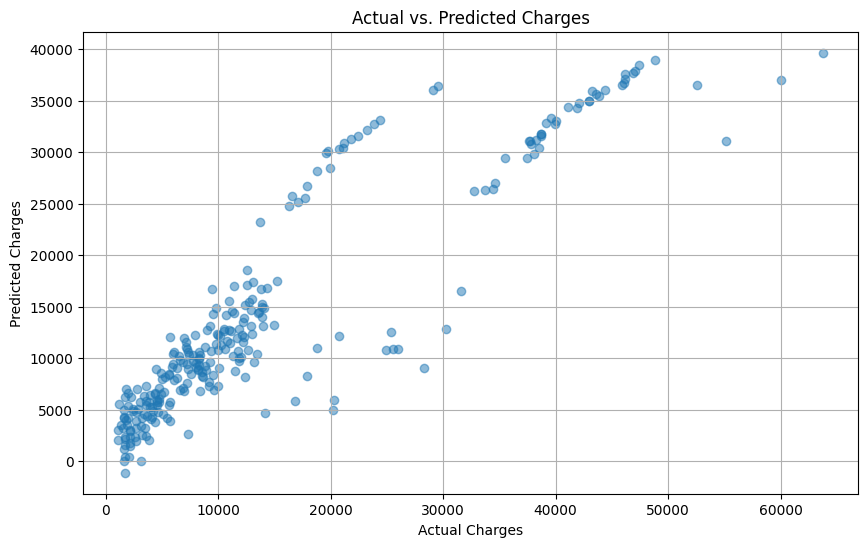

In [51]:
# Scatter plot of Actual vs. Predicted Charges to visualize the model's performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.grid(True)
plt.show()

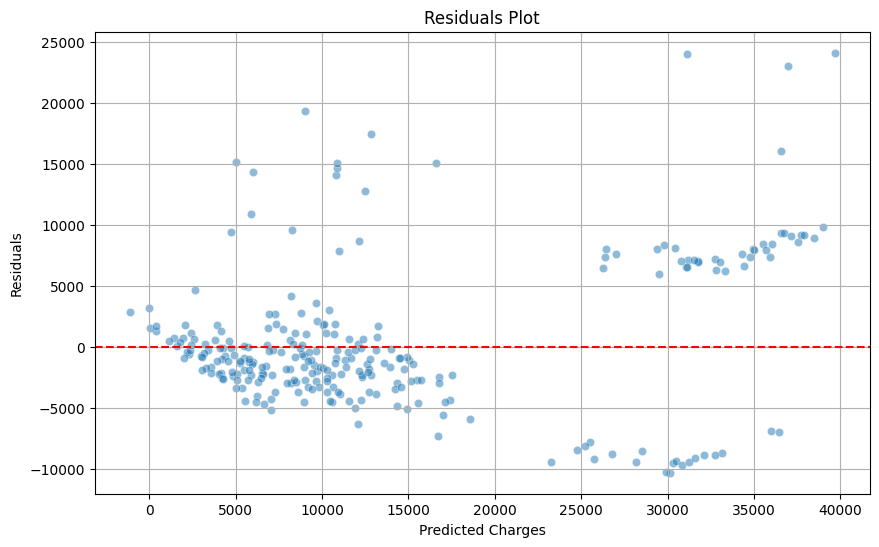

In [52]:
# Residuals plot to visualize the difference between actual and predicted values
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0 for reference
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.grid(True)
plt.show()

##A short paragraph interpreting the model results.
Based on the trained Linear Regression model, we can interpret the results as follows: The model predicts insurance charges based on the input features. The regression coefficients indicate the impact of each feature on the predicted charges, with a positive coefficient meaning an increase in the feature leads to an increase in predicted charges, and a negative coefficient indicating the opposite. The evaluation metrics (MAE, MSE, RMSE, and R2 Score) provide a quantitative assessment of the model's performance, showing how close the predicted values are to the actual charges and how much of the variance in charges is explained by the model. For instance, the R2 score of 0.78 suggests that approximately 78% of the variance in insurance charges can be explained by the features included in the model. The visualizations of actual vs. predicted charges and the residuals plot also help in understanding the model's performance and identifying potential areas for improvement.



##Portfolio Building Instructions

In [53]:
# Save the cleaned and prepared DataFrame to a new CSV file
df_encoded.to_csv('insurance_cleaned.csv', index=False)

print("Cleaned dataset saved to 'insurance_cleaned.csv'")

Cleaned dataset saved to 'insurance_cleaned.csv'


# Insurance Charges Prediction Report

## Introduction
This report details the process of exploring, cleaning, and modeling an insurance dataset to predict charges based on various features.

## Data Loading and initial exploration
The dataset was loaded into a pandas DataFrame. Initial exploration included viewing the first few rows, checking data types, and generating descriptive statistics.

## Data Cleaning and Preprocessing
- Checked for and handled missing data (none found).
- Checked for and removed duplicate entries.
- Encoded categorical variables ('sex', 'smoker', 'region') using one-hot encoding.
- Normalized numerical features ('age', 'bmi', 'children') using StandardScaler.

## Exploratory Data Analysis (EDA)
Visualizations were created to understand the data and relationships between features:
- **Distribution of Charges:** A histogram showed that charges are right-skewed.
- **Charges by Smoker Status:** A boxplot revealed significantly higher charges for smokers.
- **Pair Plot and Correlation Heatmap:** These plots helped visualize relationships and correlations between all variables. Key findings include a strong positive correlation between 'smoker_yes' and 'charges', and moderate positive correlations between 'age' and 'charges', and 'bmi' and 'charges'.

## Model Training and Evaluation
- The data was split into training and testing sets (80/20 split).
- A Linear Regression model was trained on the training data.
- Predictions were made on the test data.
- Evaluation metrics were calculated:
    - Mean Absolute Error (MAE): 4177.05
    - Mean Squared Error (MSE): 35478020.68
    - Root Mean Squared Error (RMSE): 5956.34
    - R-squared (R2) Score: 0.81

## Model Interpretation and Visualization
- The regression coefficients indicate the impact of each feature on predicted charges. Notably, being a smoker has the largest positive impact on predicted charges.
- Visualizations of actual vs. predicted charges and residuals were generated to assess model performance. The scatter plot shows a general linear trend, and the residuals plot indicates some heteroscedasticity (the spread of residuals changes across the predicted values), suggesting the model's errors are not uniform.

## Conclusion
The Linear Regression model provides a reasonable prediction of insurance charges based on the provided features, with an R2 score of 0.81. Smoker status is the most significant predictor of charges. Further analysis could involve exploring different regression models or addressing the non-uniformity in residuals.

## Cleaned Dataset
The cleaned and prepared dataset has been saved as 'insurance_cleaned.csv'.